# 1 to 1 process

In [1]:
from smpl import io

In [2]:
from pyfeyn2.interface.qgraf import style
import itertools as it
import re

In [3]:
from pyqgraf import qgraf, model
qgraf.install("3.6.5")
xml_string = qgraf.run("nu_e[p1]", "nu_e[p1]",loops=2,loop_momentum="l",model = model.gws_UnitaryGauge_reduced, style=style)

/home/apn/.local/bin/qgraf-3.6.5 qgraf.dat

 --------------------------------------------------------------
                          qgraf-3.6.5
 --------------------------------------------------------------

  output= 'output.out' ;
  style= 'tmp.sty' ;
  model = 'tmp.model';
  in= nu_e[p1];
  out= nu_e[p1];
  loops= 2;
  loop_momentum= l;
  options= notadpole,onshell;

 --------------------------------------------------------------

   #loops    v-degrees          #diagrams

      2
              -   4^2     ....     0
             3^2  4^1     ....     1
             3^4   -      ....     18


        total =  19 connected diagrams



/home/apn/.cache/pypoetry/virtualenvs/pyfeyn2-CEvJ4jFG-py3.9/lib/python3.9/site-packages/pyqgraf/qgraf.py:74: UserWarning: 
	Please cite the following papers if you use this code:

      [1] Automatic Feynman graph generation J. Comput. Phys. 105 (1993) 279--289 https://doi.org/10.1006/jcph.1993.1074

      [2] Abusing Qgraf Nucl. Instrum. Methods Phys. Res. A 559 (2006) 220--223 https://doi.org/10.1016/j.nima.2005.11.151

      [3] Feynman graph generation and propagator mixing, I Comput. Phys. Commun. 269 (2021) 108103 https://doi.org/10.1016/j.cpc.2021.108103

	
  warnings.warn(


single photon diags 2


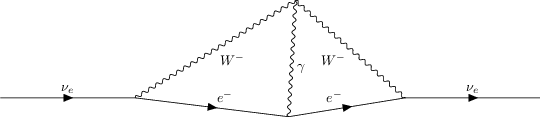

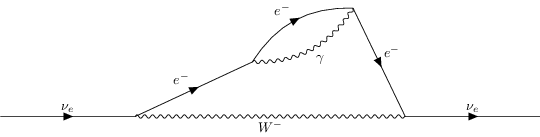

In [4]:
from xsdata.formats.dataclass.parsers import XmlParser
from pyfeyn2.render.latex.feynmp import FeynmpRender
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.render.pyx.pyxrender import PyxRender
from pyfeyn2.feynmandiagram import FeynML

from pyfeyn2.auto.bend import auto_bend
from pyfeyn2.auto.label import auto_label
from pyfeyn2.auto.position import feynman_adjust_points

parser = XmlParser()
fml = parser.from_string(xml_string, FeynML)

def filter_diag(d):
    count = 0
    ecount = 0
    for p in d.propagators:
        if p.pdgid == 22:
            count +=1
        if p.pdgid == 11:
            ecount +=1
    if count ==1 and ecount >=2:
        return True
    return False

ccount=0 
for d in fml.diagrams:
    if filter_diag(d):
        ccount +=1
print("single photon diags", ccount)

for d in fml.diagrams:
    if filter_diag(d):
        d.legs[0].with_xy(-2,0)
        d.legs[1].with_xy(2,0)
        d.get_vertex(d.legs[0].target).with_xy(-1,0)
        d.get_vertex(d.legs[1].target).with_xy(1,0)
        d = feynman_adjust_points(d,size=15,override_vertices=False)
        auto_bend(d)
        auto_label(d.propagators)
        auto_label(d.legs)
        #print(d)
        t = TikzFeynmanRender(d)
        #print(t.get_src())
        t.render(show=True)
        #break

In [5]:
print(xml_string)

<!--
 file generated by qgraf-3.6.5

  output= 'output.out' ;
  style= 'tmp.sty' ;
  model = 'tmp.model';
  in= nu_e[p1];
  out= nu_e[p1];
  loops= 2;
  loop_momentum= l;
  options= notadpole,onshell;


 You must add x= and y= with suitable vertex positions.
 Some lines may need manual bending to render properly.
-->
<feynml>
 
 <diagram
          id="Diagram1"
          incoming="1"
          outgoing="1"
          sign="+"
          symmmetry_factor="1/2"
 >


  <vertex id="Vert1">
  </vertex>

  <vertex id="Vert2">
  </vertex>

  <vertex id="Vert3">
  </vertex>



  <leg id="In1">
        <name>nu_e</name>
        <sense>incoming</sense>
        <target>Vert1</target>
        <momentum>
          <name>p1</name>
        </momentum>
  </leg>



  <leg id="Out1">
        <name>nu_e</name>
        <sense>outgoing</sense>
        <target>Vert2</target>
        <momentum>
          <name>p1</name>
        </momentum>
  </leg>



  <propagator id="Prop1">
        <name>e_minus</name>
    